In [1]:
from solution.equations_of_motion import *

In [2]:
from numpy import deg2rad , rad2deg, array, zeros, linspace
from scipy.integrate import odeint
from pydy.codegen.ode_function_generators import generate_ode_function
import numpy as np
import mpmath as mp

In [3]:
%matplotlib inline

In [4]:
from matplotlib.pyplot import plot, legend, xlabel, ylabel, rcParams

In [5]:
rcParams['figure.figsize'] = (14.0, 6.0)

In [6]:
from sympy.physics.vector import init_vprinting, vlatex
init_vprinting(use_latex='mathjax', pretty_print=False)

In [7]:
constants=[g]
for i in range(n+1) :
    constants.append(m[i])

In [8]:
for i in range(n+1) :
    constants.append(J[i])

In [9]:
for i in range(n) :
    constants.append(l[i])

In [10]:
for i in range(n) :
    constants.append(a[i])

In [11]:
for i in range(n) :
    constants.append(d[i])

In [12]:
right_hand_side=generate_ode_function(forcing_vector, q,
                                        qdot, constants,
                                        mass_matrix=mass_matrix,
                                        specifieds=[f])

In [13]:
#help(right_hand_side)

In [14]:
#help(generate_ode_function)

In [15]:
numerical_constants=np.array([9.81,   #g
                             3.34,    #m0
                              0.8512,  #m1
                              0.8973,  #m2
                        0.5519,  #m3
                        0,       #J0 
                        0.01980, #J1
                        0.02105, #J2
                        0.01818, #J3
                        0.32,    #l0
                        0.419,   #l1
                        0.485,   #l2
                        0.2,       #a0
                        0.26,     #a1
                        0.216,    #a2
                        0.00715,
                        1.9*10**-6,
                        0.00164
                        ])

In [16]:
x0 = zeros(8)

In [17]:
x0[1:4] = deg2rad(35.0)        #set q1 to q3 to 35 degree

In [18]:
numerical_specified=np.array([0]) #set f to zero fro simulation

In [19]:
#help(odeint)

In [20]:
right_hand_side(x0, 0.0, numerical_specified, numerical_constants)

array([  0.        ,   0.        ,   0.        ,   0.        ,
         2.08797822,  25.26558522,   6.88127465,   1.34302129])

In [21]:
frames_per_sec = 60
final_time = 5.0

t = linspace(0.0, final_time, final_time * frames_per_sec)

C:\Users\kuros\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


In [22]:
y = odeint(right_hand_side, x0, t, args=(numerical_specified, numerical_constants))

In [1]:
type(y)

NameError: name 'y' is not defined

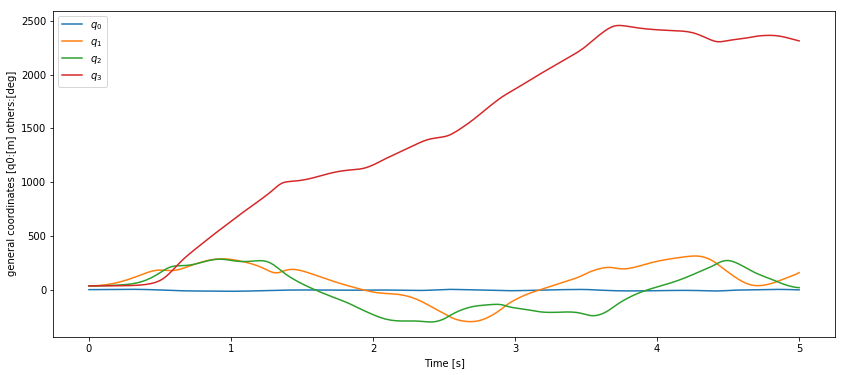

In [23]:
plot(t, rad2deg(y[:, :4]))
xlabel('Time [s]')
ylabel('general coordinates [q0:[m] others:[deg]')
legend(["${}$".format(vlatex(c)) for c in q])